In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data = load_wine()
data.target[[10, 80, 140]]

list(data.target_names)

['class_0', 'class_1', 'class_2']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=40)

In [4]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)

In [5]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

[Text(558.0, 679.5, 'flavanoids <= 1.4\nentropy = 1.553\nsamples = 119\nvalue = [41, 49, 29]\nclass = class_1'),
 Text(279.0, 407.69999999999993, 'color_intensity <= 3.725\nentropy = 0.711\nsamples = 36\nvalue = [0, 7, 29]\nclass = class_2'),
 Text(139.5, 135.89999999999998, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]\nclass = class_1'),
 Text(418.5, 135.89999999999998, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29]\nclass = class_2'),
 Text(837.0, 407.69999999999993, 'proline <= 676.0\nentropy = 1.0\nsamples = 83\nvalue = [41, 42, 0]\nclass = class_1'),
 Text(697.5, 135.89999999999998, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = class_1'),
 Text(976.5, 135.89999999999998, 'entropy = 0.496\nsamples = 46\nvalue = [41, 5, 0]\nclass = class_0')]

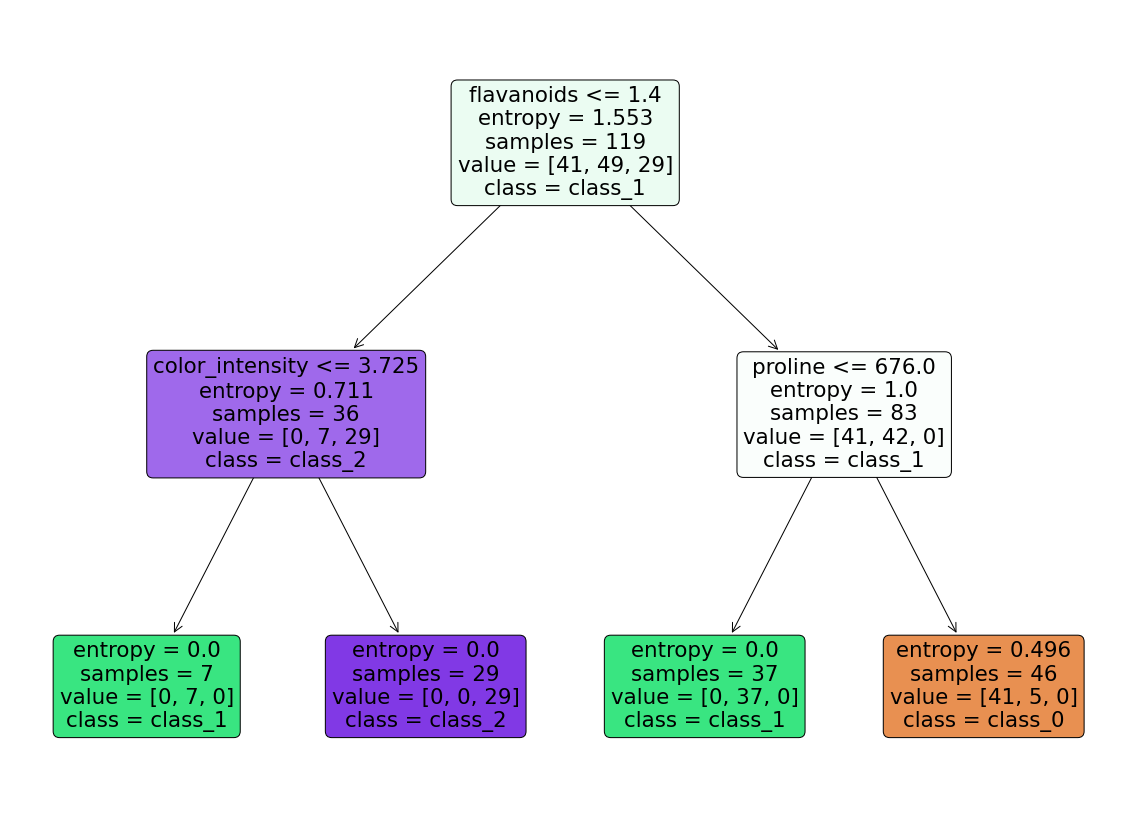

In [6]:
plt.figure(figsize=(20, 15))

tree.plot_tree(model,
               class_names = data.target_names,
               feature_names = data.feature_names,
               impurity = True,
               filled = True,
               rounded = True)

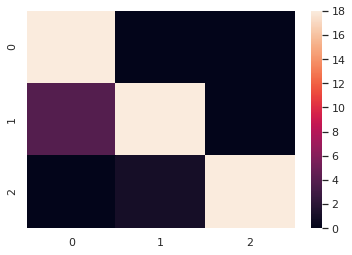

In [7]:
y_pred = model.predict(X_test)

sns.set_theme()
ax = sns.heatmap(confusion_matrix(y_test, y_pred))

In [8]:
model.score(X_test, y_test)

0.9152542372881356

In [9]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

1.0

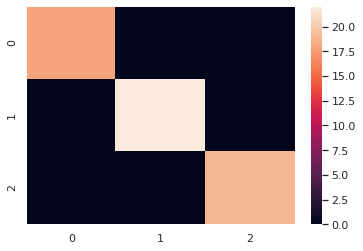

In [10]:
y_pred = clf.predict(X_test)

sns.set_theme()
ax = sns.heatmap(confusion_matrix(y_test, y_pred))